In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

#### Loading the data, first look at the data

In [3]:
df = pd.read_csv('wiki_movie_plots_deduped.csv')
print(df.columns)

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')


In [4]:
df.sample(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
11125,1989,The Big Picture,American,Christopher Guest,"Kevin Bacon, Martin Short, Teri Hatcher, J.T. ...",comedy,https://en.wikipedia.org/wiki/The_Big_Picture_...,Film student and would-be writer/director Nick...
28984,1949,Krishna Bakthi,Tamil,R. S. Mani,"P. U. Chinnappa, K. R. Ramaswamy, T. R. Rajaku...",unknown,https://en.wikipedia.org/wiki/Krishna_Bakthi_(...,Krishna Bakthi is the tale of hypocrite saint(...
27563,2017,Tiger,Kannada,Nanda Kishore,"Pradeep, Madhuurima, P. Ravishankar, Chikkanna...",thriller drama,https://en.wikipedia.org/wiki/Tiger_(2017_film),The movie Tiger is a Kannada action packed thr...
2411,1938,King of Alcatraz,American,Robert Florey,"Lloyd Nolan, Robert Preston, J. Carrol Naish","drama, action",https://en.wikipedia.org/wiki/King_of_Alcatraz,Just as gangster Steve Murkil is escaping from...
12965,1997,Dream with the Fishes,American,Finn Taylor,David Arquette,drama,https://en.wikipedia.org/wiki/Dream_with_the_F...,"The film follows Terry, a suicidal voyeur who ..."


In [5]:
df.drop(['Release Year', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis=1, inplace=True)

#### Genres

In [6]:
print('There are {} movies out of {} with unknown genres.'.format(
    df[df.Genre=='unknown'].shape[0] , df.shape[0]
))

movies_wo_genre = df[df.Genre == 'unknown']
df.drop(df[df.Genre == 'unknown'].index, inplace=True)

There are 6083 movies out of 34886 with unknown genres.


In [7]:
# genres were chosen as the words with the highest frequencies (which are also genres)
"""
genres_old = set([
    'western', 'action', 'crime', 'biography', 'comedy', 'drama', 'adventure', 'fantasy', 
    'sports', 'horror', 'historical', 'serial', 'epic', 'mystery', 'romance','war', 'spy', 
    'romcom', 'animation', 'melodrama', 'documentary', 'family', 'thriller', 'musical', 'scifi', 
    'noir', 'disaster', 'political', 'adult', 'satire', 'mockumentary',  'psychological', 
    'martial', 'superhero', 'teen', 'children', 'supernatural', 'social', 'anime'
])
"""

genres = set([
    'comedy', 'scifi', 'horror', 'romance', 'action', 'thriller', 'drama', 
    'crime', 'adventure', 'fantasy', 'children', 'amimation'
])

# we replace the following collocations with genres from our list
replacements = [
    ('science fiction', ' scifi '),
    ('science-fiction' , ' scifi '),
    ('sci fi', 'scifi'),
    ('sci-fi', 'scifi'),
    ('science', ' scifi '),
    ('animated', ' animation '),
    ('romantic comedy', ' romcom romance comedy '),
    ('romantic-comedy', ' romcom romance comedy '),
    ('rom com', ' romcom romance comedy'),
    ('romantic', ' romance '),
    ('superheroes', ' superhero '),
    ('tokusatsu', ' action '),
    ('docudrama', ' documentary drama '),
    ('dramedy', ' drama comedy '),
    ('suspense', 'thriller')
]

def make_list_of_genres(text, replacements=replacements, genres=genres):
    """
    Examples: 
    ----------
    >>> text = 'drama  / comedy-biopick,  fantasy, science-fiction,, animation film'
    >>> make_set_of_genres(text)
    ['drama', 'comedy', 'biography', 'fantasy', 'scifi', 'animation', 'film']
    """

    for replacement in replacements:
        if replacement[0] in text:
            text = text.replace(replacement[0], replacement[1])
    
    # we have words containing 'bio' replaced by 'biography'
    if 'bio' in text:
        text = re.sub(r'\b(bio\w*)', 'biography', text)
    if 'child' in text:
        text = re.sub(r'\b(child\w*)', " children ", text)
    if 'histor' in text:
        text = re.sub(r'\b(histor\w*)', " historical ", text)
        
    # I haven't found any easier way to split by multiple delimiters, including whitespaces 
    # and avoid ''
    result = set(filter(None, re.split(',|/|-|\s|–|;', text))) 
    
    
    return list(result & genres)

In [8]:
# an example of using make_set_of_genres
some_movie_genres = "drama  / comedy-biopic,  fantasy, masala science-fiction,, animation film,,  children's"
make_list_of_genres(some_movie_genres)

['children', 'scifi', 'fantasy', 'comedy', 'drama']

In [31]:
df

,Title,Genre,Plot,action,adventure,children,comedy,crime,drama,fantasy,horror,romance,scifi,thriller,Plot_tokens
0,Benny & Joon,[comedy],"Benjamin ""Benny"" Pearl and his mentally ill si...",0,0,0,1,0,0,0,0,0,0,0,"[benjamin, benni, pearl, mental, ill, sister, ..."
1,Big Brother,"[action, comedy]","Mahi, who is a rough woman gangster, used to e...",1,0,0,1,0,0,0,0,0,0,0,"[mahi, rough, woman, gangster, use, expos, man..."
2,Seeta Ramula Kalyanam Lankalo,[action],Chandra Shekhar aka Chandu (Nitin) is a darede...,1,0,0,0,0,0,0,0,0,0,0,"[chandra, shekhar, aka, chandu, nitin, daredev..."
3,Moneyball,[drama],Oakland Athletics general manager Billy Beane ...,0,0,0,0,0,1,0,0,0,0,0,"[oakland, athlet, gener, manag, billi, bean, u..."
4,Heropanti,"[romance, action]",Chaudhary (Prakash Raj) is a very well known a...,1,0,0,0,0,0,0,0,1,0,0,"[chaudhari, prakash, raj, well, known, respect..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18000,The Quiet Man,"[romance, comedy]","In the 1920s, Sean Thornton (John Wayne), an I...",0,0,0,1,0,0,0,0,1,0,0,"[1920, sean, thornton, john, wayn, irishborn, ..."
18001,The Virgin and the Gypsy,[drama],"Based on a 1926 work by D.H. Lawrence, the fil...",0,0,0,0,0,1,0,0,0,0,0,"[base, 1926, work, dh, lawrenc, film, follow, ..."
18002,Mississippi Burning,"[crime, drama]","In 1964, three civil rights workers — two Jewi...",0,0,0,0,1,1,0,0,0,0,0,"[1964, three, civil, right, worker, —, two, je..."
18003,The Old Jar Craftsman,[drama],A lonely old man who makes a living as a potte...,0,0,0,0,0,1,0,0,0,0,0,"[lone, old, man, make, live, potter, save, lif..."


In [9]:
genres_column = df.Genre.apply(make_list_of_genres)

df.Genre = genres_column

# we drop all entries where genre is not in the given list
df.drop(genres_column[genres_column.apply(len) == 0].index, inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

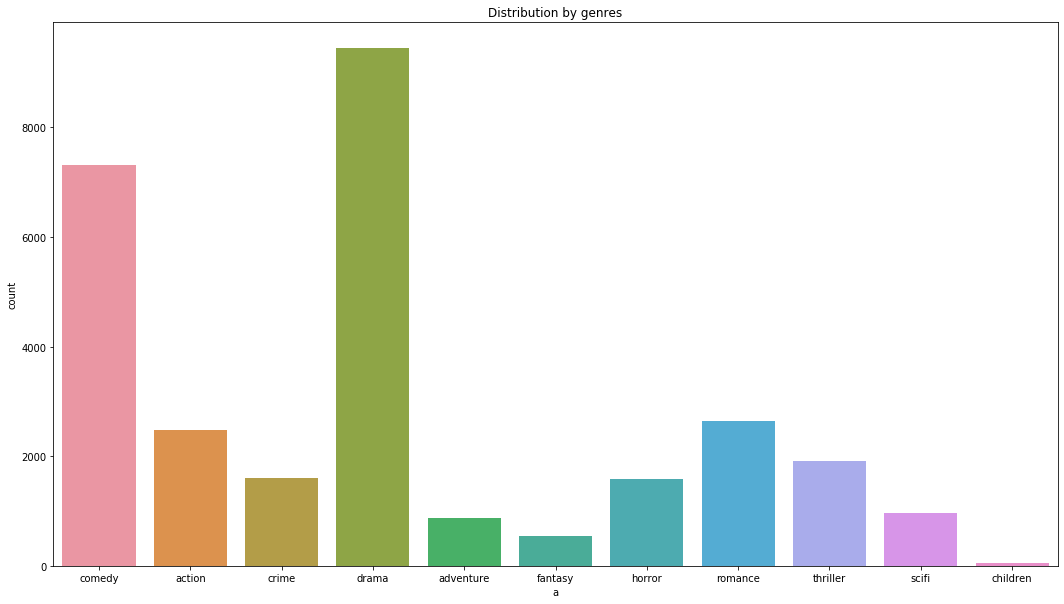

In [11]:
import seaborn as sns
plt.figure(figsize=(18, 10))
plt.title('Distribution by genres')
genres_df = pd.DataFrame({'a':[y for x in df['Genre'] for y in x]})
sns.countplot(x='a', data=genres_df)

In [12]:
# adding columns for one-hot encoding of genre
df = df.join(df.Genre.str.join('|').str.get_dummies())

#### Plot

Some stats for the plot lengths:

count    23852.000000
mean       387.565236
std        313.827841
min          2.000000
25%        128.000000
50%        312.000000
75%        605.000000
max       5130.000000
Name: Plot, dtype: float64


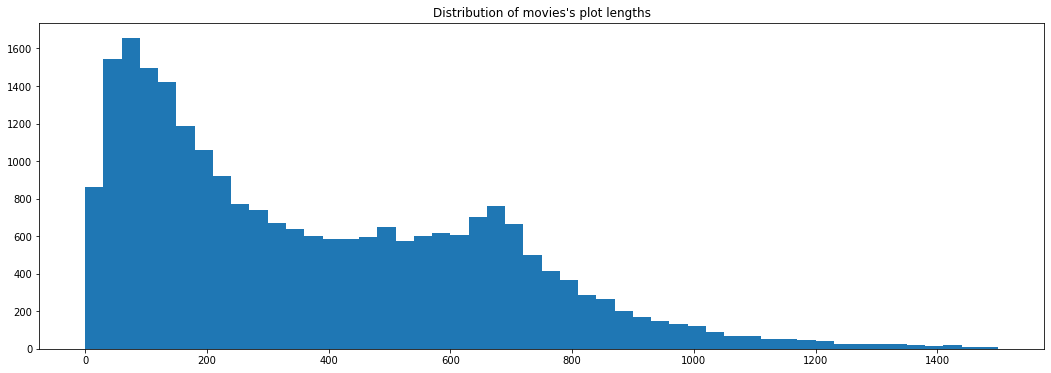

In [13]:
def num_words(text):
    return len(text.split())

plot_lengths = df.Plot.apply(num_words)
print('Some stats for the plot lengths:\n')
print(plot_lengths.describe())

plt.figure(figsize=(18, 6))
plt.hist(plot_lengths, range=(0, 1500), bins=50)
plt.title("Distribution of movies's plot lengths")
plt.show()

In [14]:
# a quick loom at what short plots look like
short_plots = df[plot_lengths < 25].sample(10).Plot
for plot in short_plots:
    print(plot + '\n')

A British naval officer volunteers for a dangerous mission to infiltrate the base of pirates who threaten shipping off Madagascar.

Henry Aldrich becomes the most sought after guy in town when he wins a date with a movie star.

Terrorists take over a mountain ski resort with a stolen nuclear weapon and a ski patrolman attempts to stop them.

A mother and wife stricken with memory loss allows a dysfunctional family a second chance at harmony and happiness.

The film tells the story of a punk's entanglements with a pure young girl.

The former Jo March (O'Brien-Moore), now married to Prof. Bhaer (Morgan), opens a boarding school for wayward boys.

Upon learning they only have a few days left to live, three brothers set off to reverse a lifetime of mistakes.[1]

Kranti Kshetra is a Campus-based Action thriller starring Mithun Chakraborty with Shakti Kapoor and Gulshan Grover.

A young couple struggle with their overbearing parents.[1]

An American tycoon, Michael Bergman, arrives in Melbo

--------------------------------------------------------------------------------------------------------------------------------
short plots aren't very informative, and it's hard to determine the genre.

In [15]:
# a quick look of what the plot of ~45 words looks like
medium_plots = df[(plot_lengths>40) & (plot_lengths<50)].sample(10).Plot
for plot in medium_plots:
    print(plot + '\n')

When Los Angeles' police force down-on-her-luck businesswoman-turned-prostitute "Princess" to help capture a murderous pimp named Ramrod it's Princess's life that is put on the line. Soon, the escaped killer is after her, and vice squad detective Tom Walsh and his team are hard pressed to keep the woman safe.

A dreamy farm widow, played by Shore, is obsessed with moving to the city. She is courted by shy-bumpkin neighbor (Young). She is almost tricked out of her oil-rich land by crooks (Merrill and Jergens) who alone knows about the oil.[4][5]

Soldiers in a rural military base are being brutally murdered. They suspect a wild cat. Two local ladies: Joyce Balentine (Flora Robson) and Ellie (Beryl Reid) suspect it may be their brother, Steven (Dafydd Havard); a man who has been locked in a basement for thirty years.

Police try to solve a case involving a woman who fell to her death from the top of a block of high-rise flats. In this film, the two detectives discover and explore their n

------------------------------------------------------------------------------------------------------------------------------
Let's cut off all the movies with short (< 40 words) plots. From the histogram above one can see that they constitute only for a small fraction of the total number of movies.

In [16]:
# dropping the rows with short plots
df.drop((df[plot_lengths < 40]).index, inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

#### removing stopwords, tokenizing

In [17]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [18]:
stopwords_english = stopwords.words('english')
ps = PorterStemmer()

In [19]:
def preprocess_text(text, stemmer, stopwords_list=stopwords_english):
    """
    Converts to lowercase, removes punctuation and stopwords, tokenizes, stems the words. 
    Returns the list of tokens.
    """
    
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokenized_text = word_tokenize(text)
    result = []
    for word in tokenized_text:
        if word not in stopwords_list:
            result.append(ps.stem(word))
        
    return result

In [20]:
df['Plot_tokens'] = ''
df['Plot_tokens'] = df.Plot.apply(preprocess_text, stopwords_list=stopwords_english, stemmer=ps)

#### Train and test data

In [21]:
from sklearn.model_selection import train_test_split
df, df_test = train_test_split(df, test_size=0.2)

In [22]:
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df_test.reset_index(inplace=True)
df_test.drop(['index'], axis=1, inplace=True)

#### Word2Vec, Tf-Idf and Getting vectors for 'Plots'

In [23]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
model = Word2Vec(df['Plot_tokens'], min_count = 25, size = 100, window=6) #change min_count = 25

In [25]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df.Plot)
tfidf_matrix_test = tfidf_vectorizer.transform(df_test.Plot) # should be plot_test
tfidf_matrix = tfidf_vectorizer.transform(df.Plot)

In [26]:
def document2vec(text, text_tokenized, idx, model, vectorizer, tfidf_matrix, vec_dim=100):
    """
    Returns vector representation of text by summing W2V vectors with Tf-Idf weights
    idx stands for the index of text inside of the tfidf_matrix
    """
    doc_vec = np.zeros(vec_dim)
    for word in text_tokenized:
        if word in model.wv.vocab and word in vectorizer.vocabulary_:
            doc_vec += model.wv[word] * tfidf_matrix[idx, vectorizer.vocabulary_[word]]
            
    return doc_vec

In [27]:
# getting vector representations for df_test['Plot'].
plot_vecs = np.empty([df.shape[0], 100]) 
for i in range(df.shape[0]):
    plot_vecs[i] = document2vec(text=df.Plot[i], text_tokenized=df['Plot_tokens'][i], 
                               idx=i, model=model, vectorizer=tfidf_vectorizer, 
                               tfidf_matrix=tfidf_matrix)

plot_vecs_test = np.empty([df_test.shape[0], 100]) 
for i in range(df_test.shape[0]):
    plot_vecs_test[i] = document2vec(text=df_test.Plot[i], text_tokenized=df_test['Plot_tokens'][i], 
                               idx=i, model=model, vectorizer=tfidf_vectorizer, 
                               tfidf_matrix=tfidf_matrix_test)

#### classification

In [36]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [37]:
genres = ['action', 'adventure', 'children', 'comedy', 'crime', 'drama',
          'fantasy', 'horror', 'romance', 'scifi', 'thriller']

In [38]:
accuracies = {}
for genre in genres:
    clf = LinearSVC(max_iter=10000)
    clf.fit(plot_vecs, y=df[genre])
    y_pred = clf.predict(plot_vecs)    
    accuracies[genre] = accuracy_score(y_pred=y_pred, y_true=df[genre])

C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Temirlan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of

In [39]:
for key, val in zip(accuracies.keys(), accuracies.values()):
    print('accuracy for ', key, ':', val)

accuracy for  action : 0.8983615662316023
accuracy for  adventure : 0.9636212163287976
accuracy for  children : 0.9980005554012774
accuracy for  comedy : 0.7066370452652041
accuracy for  crime : 0.9317967231324632
accuracy for  drama : 0.6420994168286587
accuracy for  fantasy : 0.9771730074979172
accuracy for  horror : 0.9321855040266592
accuracy for  romance : 0.89225215217995
accuracy for  scifi : 0.9594001666203832
accuracy for  thriller : 0.9166898083865593
